# Visualize precipitation data in Canada

The data of interest is available on this public server: http://132.217.140.31:8083/thredds/catalog/birdhouse/catalog.html

Let us start with the following sample data: http://132.217.140.31:8083/thredds/catalog/birdhouse/nrcan/nrcan_canada_daily/catalog.html (daily precipitation from year 1950 through 1960 inclusive).

In the following, I actually use a local copy of these files (otherwise I run into a runtime error).
**TODO** Troubleshoot.

In [1]:
year_range = range(1950, 1961)

In [2]:
import urllib

In [3]:
# Scientific packages
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
from mpl_toolkits.basemap import Basemap

In [5]:
# Interactive HTML widgets
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [6]:
dir_url = 'http://132.217.140.31:8083/thredds/dodsC/birdhouse/nrcan/nrcan_canada_daily/'
filename_list = ['nrcan_canada_daily_pr_' + str(y) + '.nc' for y in year_range]
url_list = [urllib.parse.urljoin(dir_url, fn) for fn in filename_list]
nrcan_data = sorted(url_list)

In [7]:
# Access first file.
nc = netCDF4.Dataset(nrcan_data[0], 'r')
lon = nc.variables['lon']
lat = nc.variables['lat']
lat_min = lat[:].min()
lat_max = lat[:].max()
lon_min = lon[:].min()
lon_max = lon[:].max()
lon2d, lat2d = np.meshgrid(lon[:], lat[:])
nc.close()

In [8]:
def get_mean_daily_pr(year, dt=100):
    nc = netCDF4.Dataset(nrcan_data[year - year_range[0]], 'r')
    ncvar = nc.variables['pr']
    data = 0
    # The THREDDS Data Server has a size limit on data slice requests:
    # dt splits the mean operation to deal with this.
    for t in range(0, ncvar.shape[0], dt):
        if t + dt > ncvar.shape[0]:
            tf = ncvar.shape[0]
        else:
            tf = t + dt
        data = data + ncvar[t:tf, :, :].mean(0) * (float(tf - t) / ncvar.shape[0])
    nc.close()
    return data

In [9]:
def plot_mean_daily_pr(year):
    data = get_mean_daily_pr(year)

    fig1 = plt.figure(1, figsize=(24, 12))
    ax1 = fig1.add_subplot(111)
    m = Basemap(llcrnrlat=lat_min, urcrnrlat=lat_max,
                llcrnrlon=lon_min, urcrnrlon=lon_max,
                resolution='l')
    m.drawcoastlines()
    m.drawcountries()
    m.contourf(lon2d, lat2d, data, cmap='Blues')
    m.colorbar()

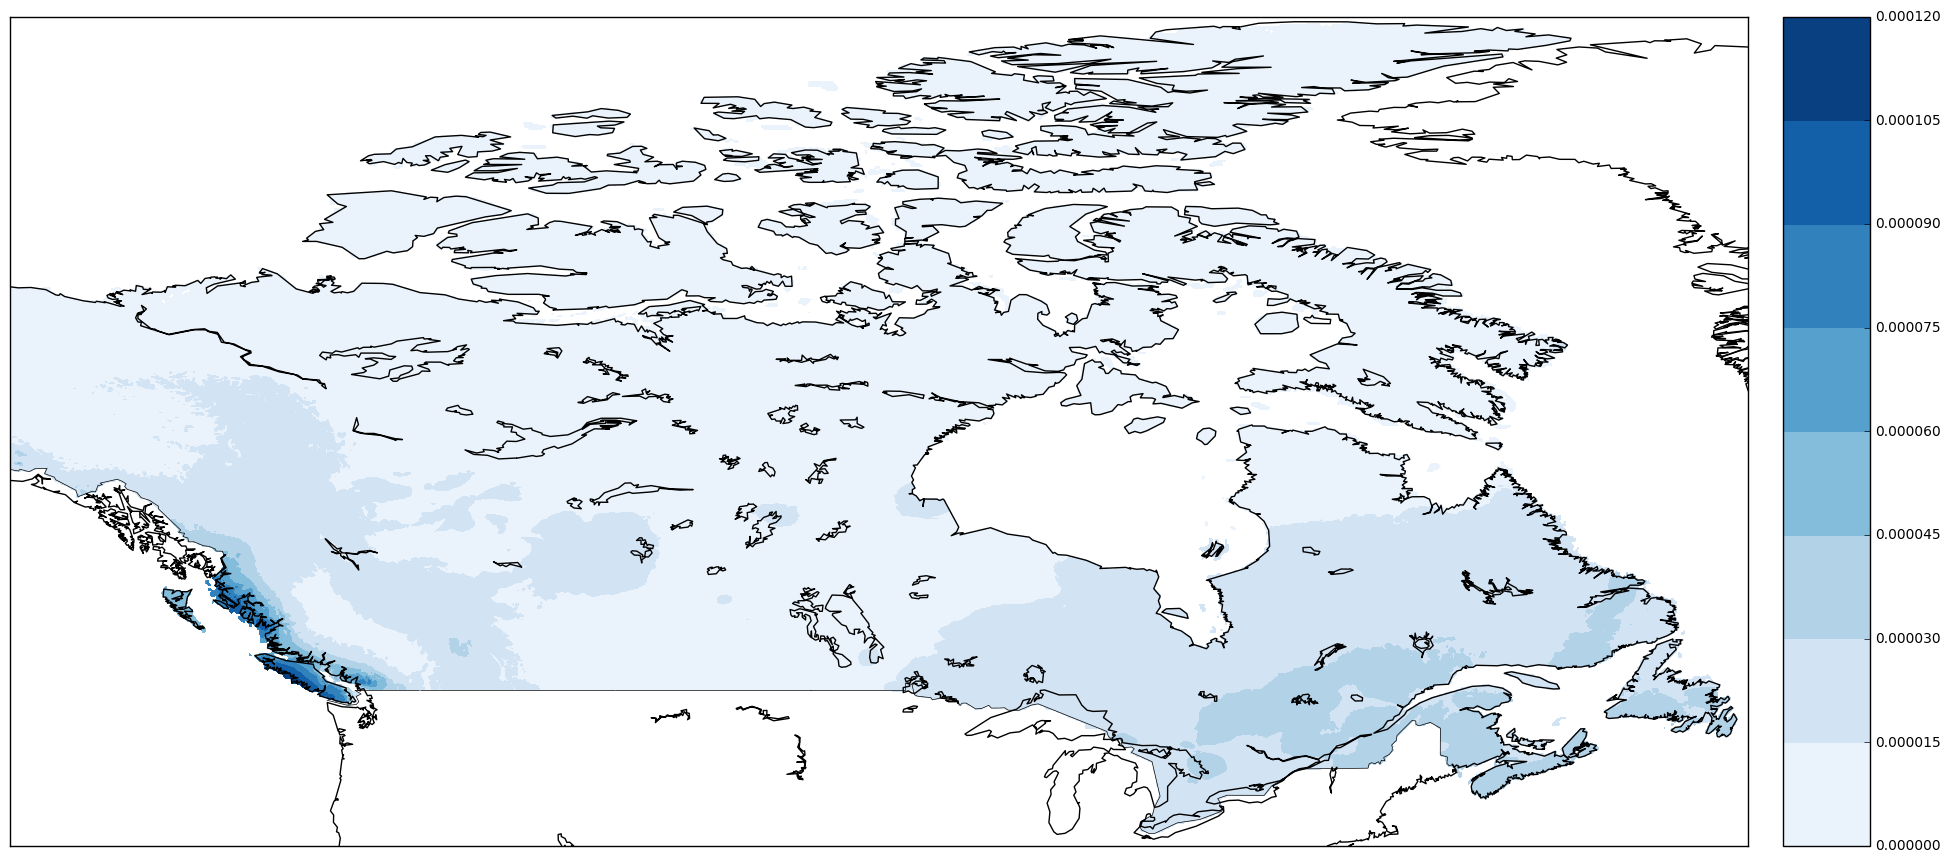

In [10]:
interact(plot_mean_daily_pr, year=widgets.IntSlider(min=year_range[0], max=year_range[-1]), __manual=True)